# Ensamble Learning

### Example (1) : ML Voting

In [ ]:
!pip install sklearn
!pip install sklearn.datasets

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2950 sha256=38a42d705faff4810b8269d3bbb55669254edaf1a7b02a435627a027dc28f0f7
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn
ERROR: Could not find a version that satisfies the requirement sklearn.datasets (from versions: none)
ERROR: No matching distribution found for sklearn.datasets


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [ ]:
#Create dataset variables for modelling or training
X, y = make_moons(n_samples=100, noise=1)
X = X + (np.random.random(size=100 * 2).reshape((100, 2)) ** 2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
#Set classifiers
log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', dt_clf)],
    voting='hard')

In [ ]:
#Fit the model
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier())])

In [ ]:
#Figuring the accuracy score of each classifier
for clf in (log_clf, dt_clf,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.68
DecisionTreeClassifier 0.52
VotingClassifier 0.68


### Example (2) : Random Forests

In [ ]:
#Import libraries
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator,TransformerMixin
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [12]:
#Load Dataset
sleep_data = pd.read_csv("./Sleep_health_and_lifestyle_dataset.csv")

In [13]:
#Display data
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [15]:
#Dropping unneeded columns
sleep_data = sleep_data.drop(["Person ID"], axis = 1)

In [16]:
#Findig Unique value in a certain column
sleep_data["Sleep Disorder"].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [17]:
#Find out if there are any null values
sleep_data.isna().any()

Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder             False
dtype: bool

In [18]:
sleep_data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [20]:
#Determinig the dependent and independent variable
X = sleep_data[[x for x in sleep_data.columns if x != "Sleep Disorder"]]
y = sleep_data["Sleep Disorder"]

X.loc[:, [0, 1]] = X.apply(lambda x: [float(x) for x in re.findall(r"(\d{2,3})\/(\d{2,3})", x["Blood Pressure"])[0]],
        axis=1, result_type="expand")

<ipython-input-20-1ac6a276e972>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, [0, 1]] = X.apply(lambda x: [float(x) for x in re.findall(r"(\d{2,3})\/(\d{2,3})", x["Blood Pressure"])[0]],


In [21]:
X = X.drop(["Blood Pressure", "Person ID"], axis=1, errors="ignore")
X = X.rename(columns={0: "SYS", 1: "DIA"})
int_col = [x for x in X.select_dtypes(int)]
X[int_col] = X[int_col].applymap(lambda x: float(x))

In [22]:
X.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,SYS,DIA
0,Male,27.0,Software Engineer,6.1,6.0,42.0,6.0,Overweight,77.0,4200.0,126.0,83.0
1,Male,28.0,Doctor,6.2,6.0,60.0,8.0,Normal,75.0,10000.0,125.0,80.0
2,Male,28.0,Doctor,6.2,6.0,60.0,8.0,Normal,75.0,10000.0,125.0,80.0
3,Male,28.0,Sales Representative,5.9,4.0,30.0,8.0,Obese,85.0,3000.0,140.0,90.0
4,Male,28.0,Sales Representative,5.9,4.0,30.0,8.0,Obese,85.0,3000.0,140.0,90.0


In [23]:
X.dtypes

Gender                      object
Age                        float64
Occupation                  object
Sleep Duration             float64
Quality of Sleep           float64
Physical Activity Level    float64
Stress Level               float64
BMI Category                object
Heart Rate                 float64
Daily Steps                float64
SYS                        float64
DIA                        float64
dtype: object

In [24]:
#Builidng a pipeline for categorical variables encoding
data_pipeline = ColumnTransformer([
                ("convert_to_catogorical", OrdinalEncoder(),["Gender", "Occupation", "BMI Category"])
], remainder="passthrough")

In [25]:
X_col = X.columns
X = data_pipeline.fit_transform(X)

In [26]:
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y.fillna("0"))

In [27]:
X.shape, y.shape

((374, 12), (374,))

In [28]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77)

#### Decision Tree

In [29]:
clf_tree = tree.DecisionTreeClassifier(max_depth=3)

In [30]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
clf_tree.score(X_train, y_train), clf_tree.score(X_test, y_test)

(0.9178571428571428, 0.8829787234042553)

[Text(0.5, 0.875, 'x[2] <= 1.5\ngini = 0.576\nsamples = 280\nvalue = [60, 162, 58]'),
 Text(0.25, 0.625, 'x[5] <= 5.5\ngini = 0.133\nsamples = 157\nvalue = [7, 146, 4]'),
 Text(0.125, 0.375, 'x[11] <= 86.5\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.375, 0.375, 'x[1] <= 9.5\ngini = 0.1\nsamples = 154\nvalue = [5, 146, 3]'),
 Text(0.3125, 0.125, 'gini = 0.091\nsamples = 148\nvalue = [5, 141, 2]'),
 Text(0.4375, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.75, 0.625, 'x[6] <= 70.0\ngini = 0.605\nsamples = 123\nvalue = [53, 16, 54]'),
 Text(0.625, 0.375, 'x[10] <= 128.5\ngini = 0.422\nsamples = 72\nvalue = [53, 11, 8]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.6875, 0.125, 'gini = 0.275\nsamples = 63\nvalue = [53, 2, 8]'),
 Text(0.875, 0.375, 'x[3] <= 46.0\ngini = 0.177\nsamples = 51\nval

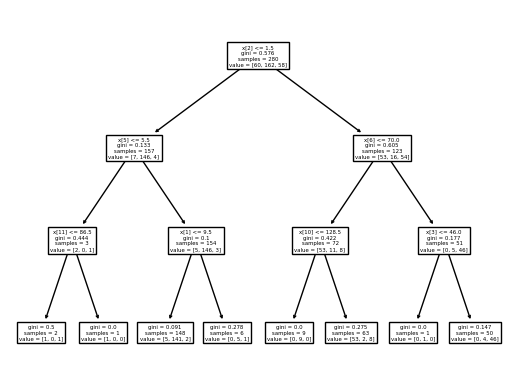

In [32]:
#Plotting the tree
tree.plot_tree(clf_tree)

#### Random Forests

In [33]:
clf = RandomForestClassifier(
    max_depth=4,
    random_state=0,
    n_estimators=200)

In [34]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=0)

In [35]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9321428571428572, 0.8936170212765957)

In [36]:
#Feature importance
for name, score in zip(X_col, clf.feature_importances_):
    print(name, score)

Gender 0.007982908501810769
Age 0.13294313476709496
Occupation 0.17989153250148518
Sleep Duration 0.07367327151868415
Quality of Sleep 0.07063061739448524
Physical Activity Level 0.02682446944821355
Stress Level 0.06458440448846094
BMI Category 0.04015099545174018
Heart Rate 0.03519037597736181
Daily Steps 0.04565581662351279
SYS 0.15764682620831488
DIA 0.16482564711883552


#### Gradient Boosting

In [37]:
gb_clf = GradientBoostingRegressor(max_depth=4, n_estimators=300, learning_rate=0.2)

In [38]:
gb_clf.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=300)

In [39]:
gb_clf.score(X_train, y_train), gb_clf.score(X_test, y_test)

(0.8650666648671831, 0.3939757115364546)

In [40]:
for name, score in zip(X_col, gb_clf.feature_importances_):
    print(name, score)

Gender 0.024398643059618096
Age 0.04816304965613218
Occupation 0.19439688438680716
Sleep Duration 0.10884395323736787
Quality of Sleep 0.03081455932344979
Physical Activity Level 0.004540007757762399
Stress Level 0.010063962887312925
BMI Category 0.00023236127751312307
Heart Rate 0.03489945955546766
Daily Steps 0.013830284215753597
SYS 0.02065268498728129
DIA 0.5091641496555338


In [41]:
gb_clf.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [42]:
gb_clf.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x7A26A6623640)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x7A26A6623640)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x7A26A6623640)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x7A26A6623640)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x7A26A6623640)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x7A26A6623640)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
       